In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm
import datetime
from tueplots import bundles
from tueplots.constants.color.palettes import rgb
from matplotlib import font_manager

read_path = r'C:\Users\Julia\Documents\Uni\Master\1\Data-Literacy\Data-Literacy\Data\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")

df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

In [2]:
time_after = 4*7
time_before = 16*7

In [3]:
# filter data: get highest article values, long time before, short time after
dates_max = df.sort_values('standardized_war_articles').nlargest(10, 'standardized_war_articles')
results = {}
plot_parties = ["Union", "SPD", "Grüne"]

for date in dates_max['date']:
    df_res = pd.DataFrame(columns=["R2 Reg", "RMSE", "RMSPE", "Mean diff"])
    results.update({date: df_res})
    date_after = date + datetime.timedelta(days=time_after)
    date_before = date - datetime.timedelta(days=time_before)
    total_df = df[(df["date"] <= date_after) & (df["date"] >= date_before)]
    regression_df = total_df[total_df["date"] < date]
    pred_df = total_df[total_df["date"] >= date]
    for party in ["Union", "SPD", "Grüne", "FDP", "AfD", "Linke"]:
        total_df = df[(df["date"] <= date_after) & (df["date"] >= date_before)]
        regression_df = total_df[total_df["date"] < date]
        pred_df = total_df[total_df["date"] >= date]
        regression_df = regression_df[(~regression_df[party].isna())]
        pred_df = pred_df[(~pred_df[party].isna())]
        if regression_df.empty or pred_df.empty:
            continue
        X = regression_df.index.values
        Y = regression_df[party]
        # fit model
        model = sm.OLS(Y, X).fit()
        #print(model.summary())
        r2_reg = model.rsquared
        # get values for regression
        y_reg = model.predict(X)
        mse_reg = rmse(Y, y_reg)
        # get values for prediction
        X_pred = pred_df.index.values
        Y_pred = pred_df[party]
        y_pred = model.predict(X_pred)
        mse_pred = rmse(Y_pred, y_pred)
        df_res.loc[party, "RMSE"] = round(mse_reg, 2)
        df_res.loc[party, "RMSPE"] = round(mse_pred, 2)
        df_res.loc[party, "R2 Reg"] = round(r2_reg, 3)
        # calculate difference
        real_values = pred_df[party]
        diff = real_values - y_pred
        mean_diff = np.mean(diff)
        df_res.loc[party, "Mean diff"] = round(mean_diff, 2)

In [4]:
for date in dates_max['date']:
    print(date)
    print(results[date])

2003-03-28 00:00:00
      R2 Reg  RMSE RMSPE Mean diff
Union  0.999  1.14  1.36     -1.17
SPD    0.998  1.14  2.23      2.19
Grüne  0.996  0.73  0.67      0.17
FDP    0.987  0.66  0.51     -0.11
Linke   0.98  0.48  0.43     -0.15
2022-03-18 00:00:00
      R2 Reg  RMSE RMSPE Mean diff
Union  0.984  3.01  4.57      4.52
SPD    0.997  1.31  2.55      2.54
Grüne  0.999   0.5  3.92       3.8
FDP    0.993  0.88  0.91     -0.85
AfD    0.994  0.91  1.02      1.01
Linke  0.998  0.25  0.41      -0.4
2003-04-04 00:00:00
      R2 Reg  RMSE RMSPE Mean diff
Union  0.999  1.18  1.28     -0.64
SPD    0.998  1.25  1.74      1.39
Grüne  0.996  0.69  0.75      0.04
FDP    0.987  0.65   0.7      0.29
Linke  0.981  0.47  0.51      0.12
2022-04-07 00:00:00
      R2 Reg  RMSE RMSPE Mean diff
Union  0.993  2.17   3.1      2.96
SPD    0.996  1.48  2.05       2.0
Grüne  0.996  0.97  3.99      3.98
FDP    0.998  0.43   0.5     -0.03
AfD    0.998  0.56  0.71      0.67
Linke  0.996  0.29  0.79     -0.68
2022-03-03

In [5]:
# write tex file+
iraq = 0
ukraine = 0
for date in results:
    if (date.year == 2003 or date.year == 2002) and iraq < 2:
        iraq += 1          
        df_now = results[date]
        with open(date.strftime("%d.%m.%Y") + ".tex", "w") as f:
            f.write(df_now.to_latex(columns=["RMSE", "RMSPE", "Mean diff"]))
    if (date.year == 2023 or date.year == 2022) and ukraine < 2:
        ukraine += 1          
        df_now = results[date]
        with open(date.strftime("%d.%m.%Y") + ".tex", "w") as f:
            f.write(df_now.to_latex(columns=["RMSE", "RMSPE", "Mean diff"]))

C:\Users\Julia\AppData\Local\Temp\ipykernel_1568\757030075.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_now.to_latex(columns=["RMSE", "RMSPE", "Mean diff"]))
C:\Users\Julia\AppData\Local\Temp\ipykernel_1568\757030075.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_now.to_latex(columns=["RMSE", "RMSPE", "Mean diff"]))
C:\Users\Julia\AppData\Local\Temp\ipykernel_1568\757030075.py:9: FutureWarning: In future versions `DataFrame.to_latex` is ex

In [6]:
# get prediction interval
def ols_quantile(m, X, q):
  # m: OLS model.
  # X: X matrix.
  # q: Quantile.
  #
  # Set alpha based on q.
  a = q * 2
  if q > 0.5:
    a = 2 * (1 - q)
  predictions = m.get_prediction(X)
  frame = predictions.summary_frame(alpha=a)
  if q > 0.5:
    return frame.obs_ci_upper
  return frame.obs_ci_lower

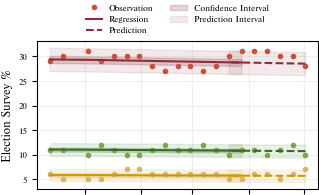

In [7]:
# plot
date = dates_max.iloc[2]['date']
colors = {
    "Union": 'gray',
    "SPD": rgb.tue_ocre,
    "Grüne": rgb.tue_green,
    "Linke": rgb.tue_violet,
    "AfD": rgb.tue_lightblue,
    "FDP": rgb.tue_lightorange
}
colors_reg = {
    "Union": rgb.tue_dark,
    "SPD": rgb.tue_red,
    "Grüne": rgb.tue_darkgreen,
    "Linke": rgb.tue_violet,
    "AfD": rgb.tue_blue,
    "FDP": rgb.tue_orange
}

plt.rcParams.update(bundles.icml2022(column='half', nrows=1, ncols=1, usetex=False))
fig, ax1 = plt.subplots() 
plt.xticks(rotation=45)
ax1.set_xticklabels([]) 
#ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Survey %')
ax1.grid(color=rgb.tue_gray, alpha = 0.2)
date_after = date + datetime.timedelta(days=time_after)
date_before = date - datetime.timedelta(days=time_before)
total_df = df[(df["date"] <= date_after) & (df["date"] >= date_before)]

regression_df = total_df[total_df["date"] < date]
pred_df = total_df[total_df["date"] >= date - datetime.timedelta(days=15)] # include date in prediction line

legend_labels = [] 
for party in ["SPD", "Grüne", 'FDP']:
    regression_df = regression_df[(~regression_df[party].isna())]
    pred_df = pred_df[(~pred_df[party].isna())]
    if regression_df.empty or pred_df.empty:
        continue
    X = regression_df.index.values
    Y = regression_df[party]
    # fit model
    model = sm.OLS(Y, X).fit()
    # get values for regression
    y_reg = model.predict(X)
    # get values for prediction
    X_pred = pred_df.index.values
    Y_pred = pred_df[party]
    y_pred = model.predict(X_pred)
  
    ax1.plot(total_df['date'], total_df[party], color=colors[party], marker='.', linestyle='', label=f'{party} - Obervation')
    ax1.plot(regression_df['date'], y_reg, color = colors_reg[party], label=f'{party} - Regressionline')
    ax1.plot(pred_df['date'], y_pred, linestyle = '--', color = colors_reg[party], label=f'{party} - Predictionline')
    
   
    # confidence interval
    pred = model.get_prediction(X).summary_frame()
    ax1.fill_between(regression_df['date'], pred['mean_ci_lower'], pred['mean_ci_upper'], color=colors_reg[party], alpha=0.2, label = f'{party} - Confidence Interval')

    # prediction interval
    upper = ols_quantile(model, X_pred, 0.95)
    lower = ols_quantile(model, X_pred, 0.05)
    ax1.fill_between(pred_df['date'], upper, lower, color=colors_reg[party], alpha=0.1, label = f'{party} - Prediction Interval')
    
    # prediction interval
    upper = ols_quantile(model, X, 0.95)
    lower = ols_quantile(model, X, 0.05)
    ax1.fill_between(regression_df['date'], upper, lower, color=colors_reg[party], alpha=0.1)

    if party == "SPD":
        legend_labels.extend(['Observation', 'Regression', 'Prediction', 'Confidence Interval', 'Prediction Interval'])  # Add labels for "Union" party, confidence, and prediction intervals


plt.legend(legend_labels, bbox_to_anchor=(0.85, 1.3), ncol=2, frameon=False)
plt.savefig('Linear Regression_regierung' + '.pdf', format='pdf')
plt.show()

C:\Users\Julia\AppData\Local\Temp\ipykernel_1568\3743834117.py:78: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.gcf().autofmt_xdate()


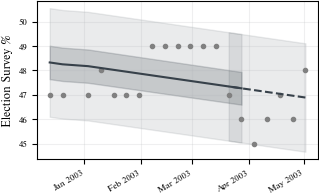

In [8]:
# plot
date = dates_max.iloc[2]['date']
colors = {
    "Union": 'gray',
    "SPD": rgb.tue_ocre,
    "Grüne": rgb.tue_green,
    "Linke": rgb.tue_violet,
    "AfD": rgb.tue_lightblue,
    "FDP": rgb.tue_lightorange
}
colors_reg = {
    "Union": rgb.tue_dark,
    "SPD": rgb.tue_red,
    "Grüne": rgb.tue_darkgreen,
    "Linke": rgb.tue_violet,
    "AfD": rgb.tue_blue,
    "FDP": rgb.tue_orange
}

plt.rcParams.update(bundles.icml2022(column='half', nrows=1, ncols=1, usetex=False))
fig, ax1 = plt.subplots() 
plt.xticks(rotation=45)
#ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Survey %')
ax1.grid(color=rgb.tue_gray, alpha = 0.2)
date_after = date + datetime.timedelta(days=time_after)
date_before = date - datetime.timedelta(days=time_before)
total_df = df[(df["date"] <= date_after) & (df["date"] >= date_before)]

regression_df = total_df[total_df["date"] < date]
pred_df = total_df[total_df["date"] >= date - datetime.timedelta(days=15)] # include date in prediction line



legend_labels = [] 
for party in ['Union', 'AfD', 'Linke']:
    regression_df = regression_df[(~regression_df[party].isna())]
    pred_df = pred_df[(~pred_df[party].isna())]
    if regression_df.empty or pred_df.empty:
        continue
    X = regression_df.index.values
    Y = regression_df[party]
    # fit model
    model = sm.OLS(Y, X).fit()
    # get values for regression
    y_reg = model.predict(X)
    # get values for prediction
    X_pred = pred_df.index.values
    Y_pred = pred_df[party]
    y_pred = model.predict(X_pred)
  
    ax1.plot(total_df['date'], total_df[party], color=colors[party], marker='.', linestyle='', label=f'{party} - Obervation')
    ax1.plot(regression_df['date'], y_reg, color = colors_reg[party], label=f'{party} - Regressionline')
    ax1.plot(pred_df['date'], y_pred, linestyle = '--', color = colors_reg[party], label=f'{party} - Predictionline')
    
   
    # confidence interval
    pred = model.get_prediction(X).summary_frame()
    ax1.fill_between(regression_df['date'], pred['mean_ci_lower'], pred['mean_ci_upper'], color=colors_reg[party], alpha=0.2, label = f'{party} - Confidence Interval')

    # prediction interval
    upper = ols_quantile(model, X_pred, 0.95)
    lower = ols_quantile(model, X_pred, 0.05)
    ax1.fill_between(pred_df['date'], upper, lower, color=colors_reg[party], alpha=0.1, label = f'{party} - Prediction Interval')
    
    # prediction interval
    upper = ols_quantile(model, X, 0.95)
    lower = ols_quantile(model, X, 0.05)
    ax1.fill_between(regression_df['date'], upper, lower, color=colors_reg[party], alpha=0.1)

    if party == "Union":
        legend_labels.extend(['Observation', 'Regression', 'Prediction', 'Confidence Interval', 'Prediction Interval'])  # Add labels for "Union" party, confidence, and prediction intervals


# Set date format to 'Dec 2021'
date_format = mdates.DateFormatter('%b %Y')  # %b for abbreviated month, %Y for year
ax1.xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()

#plt.legend(legend_labels, bbox_to_anchor=(0.85, 1.15), ncol=2, frameon=False)
plt.savefig('Linear Regression_Opposition' + '.pdf', format='pdf')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


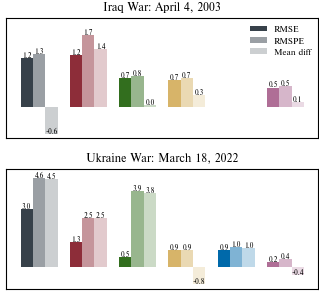

In [9]:
# plot compare RMSE with RMSPE and Mean diff
data_iraq = {
    'Party': ['Union', 'SPD', 'Grüne', 'FDP', 'AfD', 'Linke'],
    'RMSE Iraq': [1.18, 1.25, 0.69, 0.65, None, 0.47],  # None for missing values
    'RMSPE Iraq': [1.28, 1.74, 0.75, 0.7, None, 0.51],
    'Mean diff Iraq': [-0.64, 1.39, 0.04, 0.29, None, 0.12],  # None for missing values
}
df_iraq = pd.DataFrame(data_iraq)

data_ukraine = {
    'Party': ['Union', 'SPD', 'Grüne', 'FDP', 'AfD', 'Linke'],
    'RMSE Ukraine': [3.01, 1.31, 0.5, 0.88, 0.91, 0.25],
    'RMSPE Ukraine': [4.57, 2.55, 3.92, 0.91, 1.02, 0.41],
    'Mean diff Ukraine': [4.52, 2.54, 3.8, -0.85, 1.01, -0.4]
}
df_ukraine = pd.DataFrame(data_ukraine)

colours_party = {'SPD': rgb.tue_red, 'Union': rgb.tue_dark, 'Grüne': rgb.tue_darkgreen,
                   'FDP': rgb.tue_lightorange, 'AfD': rgb.tue_blue, 'Linke': rgb.tue_violet}

bar_width = 0.25
bar_positions = np.arange(len(df_iraq['Party']))

plt.rcParams.update(bundles.icml2022(column='half', nrows=3, ncols=2, usetex=False))

fig, (ax1, ax2) = plt.subplots(2,1)  # 1 row, 2 columns

# Iraq War Plot
bars1 = ax1.bar(bar_positions - bar_width, df_iraq['RMSE Iraq'], bar_width, color=[colours_party[partei] for partei in df_iraq['Party']], alpha=1, label='RMSE')
bars2 = ax1.bar(bar_positions, df_iraq['RMSPE Iraq'], bar_width, color=[colours_party[partei] for partei in df_iraq['Party']], alpha=0.5, label='RMSPE')
bars3 = ax1.bar(bar_positions + bar_width, df_iraq['Mean diff Iraq'], bar_width, color=[colours_party[partei] for partei in df_iraq['Party']], alpha=0.25, label='Mean diff')
ax1.set_xticks(bar_positions)
ax1.set_ylim(min(min(df_iraq['RMSE Iraq']), min(df_iraq['RMSPE Iraq']), min(df_iraq['Mean diff Iraq'])) -0.1 ,
            max(max(df_iraq['RMSE Iraq']), max(df_iraq['RMSPE Iraq']), max(df_iraq['Mean diff Iraq'])) + 0.4)  # Adjusted ylim
#ax1.set_xticklabels(df_iraq['Party'])
ax1.legend(loc='upper right', frameon=False)
ax1.set_title('Iraq War: April 4, 2003')
#ax1.set_xticklabels([]) 
ax1.set_xticks([])
ax1.set_yticks([])
# Annotate each bar with its value
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height, '%.1f' % height, ha='center', va='bottom',  fontsize=5)

# Ukraine War Plot
bars1 = ax2.bar(bar_positions - bar_width, df_ukraine['RMSE Ukraine'], bar_width, color=[colours_party[partei] for partei in df_ukraine['Party']], alpha=1, label='RMSE')
bars2 = ax2.bar(bar_positions, df_ukraine['RMSPE Ukraine'], bar_width, color=[colours_party[partei] for partei in df_ukraine['Party']], alpha=0.5, label='RMSPE')
bars3 = ax2.bar(bar_positions + bar_width, df_ukraine['Mean diff Ukraine'], bar_width, color=[colours_party[partei] for partei in df_ukraine['Party']], alpha=0.25, label='Mean diff')
#ax2.set_xticks(bar_positions)
ax2.set_xticks([])
ax2.set_yticks([])
#ax1.legend(loc='upper right')
ax2.set_ylim(min(min(df_ukraine['RMSE Ukraine']), min(df_ukraine['RMSPE Ukraine']), min(df_ukraine['Mean diff Ukraine'])) -0.25,
            max(max(df_ukraine['RMSE Ukraine']), max(df_ukraine['RMSPE Ukraine']), max(df_ukraine['Mean diff Ukraine'])) + 0.5)  # Adjusted ylim
#ax2.set_xticklabels(df_ukraine['Party'])
ax2.set_title('Ukraine War: March 18, 2022')

# Annotate each bar with its value
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height, '%.1f' % height, ha='center', va='bottom',  fontsize=5)

#plt.tight_layout()
plt.savefig('Combined_Plots.pdf', format='pdf')
plt.show()